# Project: Movies Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis

>#### Q: Which genres are most common between movie releases?
>#### Q: What kinds of properties are associated with movies that have high revenues?
>#### Q: Is the revenue of the movie related to the budget of it?
>#### Q: Do movies' budget affect their ratings? Do people tend to like (give high ratings) to movies that cost producers high budget? 
>#### Q: Who are the top 15 actors that appears most frequently across all movies?
>#### Q: Top 15 Director Who Directs Maximum Movies?
>#### Q: What kinds of properties are associated with movies that have high revenues?


In [51]:
# import imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

% matplotlib inline

In [52]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


<a id='wrangling'></a>
## Data Wrangling

We will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.


In [53]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [54]:

df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Data wrangling observations to consider later in cleaning process:
> 1. We need to delete unecessary columns that would not be useful in our analysis, such as id, imdb_id, vote_count, production_company, keywords and homepage.
> 2. Remove duplicated rows (if any was found).
> 3. Fill in missing values with either zeroes, means or suitable values. 
> 4. Convert release date column to datetime formats for better date-time analysis


### Data Cleaning

> **1. Delete unecessary columns**

In [56]:
# drop columns that would not be useful for our analysis
unnecessary_clmns = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df = df.drop(unnecessary_clmns, axis=1)

In [57]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **2. Remove duplicated rows (if any was found).**

In [58]:
df.drop_duplicates(keep ='first', inplace=True)

In [59]:
df.shape

(10865, 14)

> **3. Fill in missing values with appropriate values.**

In [60]:
df['genres'] = df['genres'].fillna('General')

<a id='eda'></a>
## Exploratory Data Analysis


### **Q**: Which genres are most common between movie releases?


> Separate multi-genre column separated by "|" into as .**
Some movie titles have multi-genres (hyrid genre), so in order to facilitate our analysis with respect to genres, we are going to split the genre column values which are split by an '|' into as many columns as needed.

In [61]:
df.genres.value_counts()


Comedy                                                712
Drama                                                 712
Documentary                                           312
Drama|Romance                                         289
Comedy|Drama                                          280
                                                     ... 
Action|Adventure|Drama|Foreign                          1
Science Fiction|Action|Thriller|Adventure               1
Thriller|Action|Drama|Crime                             1
Adventure|Fantasy|Animation|Science Fiction|Family      1
Action|Adventure|Romance|Thriller                       1
Name: genres, Length: 2040, dtype: int64

In [62]:
# define a function to sepaarate multi-value column, in which values are separated by "|" 
def separate_hybrid_values(column):
    
    # create a string containing all values of rows for the same column
    # separated by a separator '|' between each row
    whole_column_str = df[column].str.cat(sep = '|')
    
    # create a series of every value 
    values_series = pd.Series(whole_column_str.split('|'))
    
    return values_series

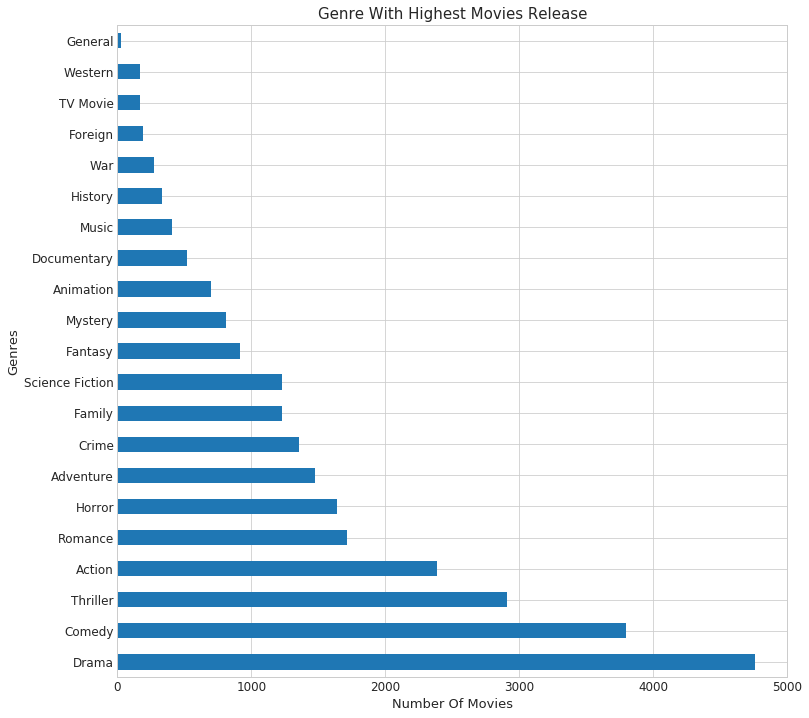

In [63]:
# count hybrid values for column 'genres'
genres_count = separate_hybrid_values('genres').value_counts()

# plot the result
genres_count.plot(kind='barh', figsize=(12,12), fontsize=12)

#setup the title and the labels of the plot.
plt.title("Genre With Highest Movies Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

#### Setup a new dataframe to draw the relation between genre popularity over the years
> 1. Split the genres from the hybrid (multi-genre) rows of every movie.
> 2. Map the values of each row for every year with the value of its popularity
> 3. Increment the values of popularity for the same year.

In [64]:
# map all the rows of genres in a list.
multi_genres_list = list(map(str,(df['genres'])))


In [65]:
# create a genre list ['Actions', 'Adventure', 'Comedy', etc... ]
genres = separate_hybrid_values('genres').unique().tolist()
genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'General',
 'Foreign']

In [66]:
# make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

# make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genres, columns = range(df['release_year'].min(), df['release_year'].max()+1))

# change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

In [67]:
# loop over every genre in every multi-genre and increment the value of popularity for every year

z = 0

for multi_genre in multi_genres_list:
    split_genre = list(map(str,multi_genre.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1
    
    

In [68]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_df_std = calculate_std(popularity_df)

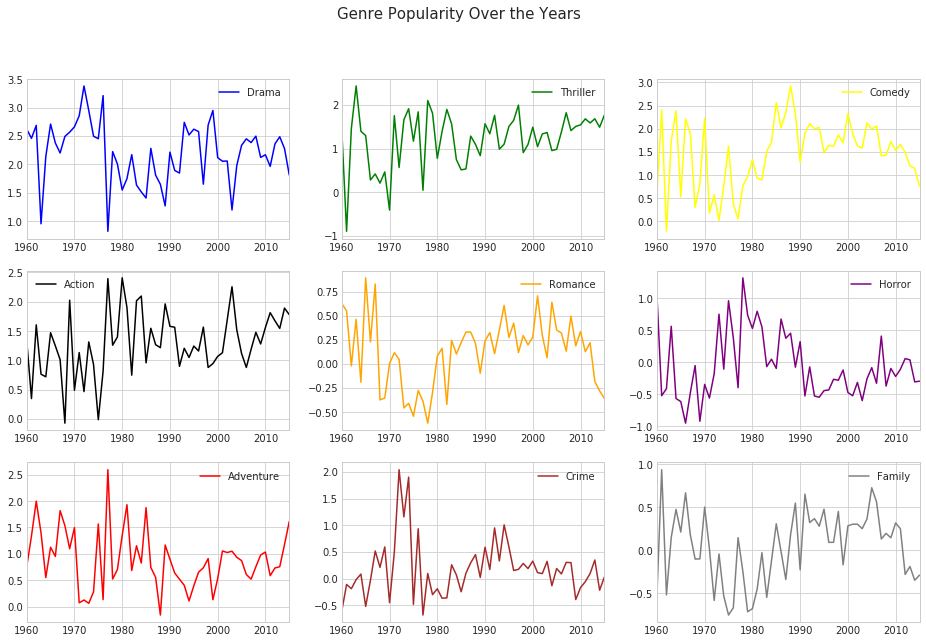

In [69]:
# How the popularity of the genre differ year by year.
# Here, we are going to plot how the most 9 genres of movie releases variates from year to year 

# make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over the Years',fontsize = 15)

# plot the 'Drama' genre plot see the popularity difference over year to year.
popular_df_std.loc['Drama'].plot(label = "Drama",color = 'blue',ax = ax[0][0],legend=True)
popular_df_std.loc['Comedy'].plot(label = "Comedy",color = 'yellow',ax = ax[0][2],legend=True)
popular_df_std.loc['Thriller'].plot(label = "Thriller",color = 'green',ax = ax[0][1],legend=True)
popular_df_std.loc['Action'].plot(label = "Action",color = 'black',ax = ax[1][0],legend=True)
popular_df_std.loc['Romance'].plot(label = "Romance",color = 'orange',ax = ax[1][1],legend=True)
popular_df_std.loc['Horror'].plot(label = "Horror",color = 'purple',ax = ax[1][2],legend=True)
popular_df_std.loc['Adventure'].plot(label ="Adventure",color = 'red',ax = ax[2][0],legend=True)
popular_df_std.loc['Crime'].plot(label = "Crime",color = 'brown',ax = ax[2][1],legend=True)
popular_df_std.loc['Family'].plot(label = "Family",color = 'grey',ax = ax[2][2],legend=True)

### **Q**: What kinds of properties are associated with movies that have high revenues?


In [70]:
# sort the dataframe according to revenues
df_sorted_revenue = df.sort_values(by=['revenue'], ascending=False)

# list of properties to explore their association with high revenues
properties = ['revenue', 'popularity', 'genres', 'production_companies', 'runtime', 'vote_average', 'vote_count', 'director', 'budget']
df_sorted_revenue = df_sorted_revenue[properties]

df_sorted_revenue

KeyError: "['production_companies'] not in index"

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (16,6))
fig.suptitle("Correlation between several properties against its Revenue",fontsize=14)

sns.regplot(x=df_sorted_revenue['revenue'], y=df_sorted_revenue['popularity'], color='black', ax=axes[0][0])
sns.regplot(x=df_sorted_revenue['revenue'], y=df_sorted_revenue['vote_average'], color='blue', ax=axes[0][1])
sns.regplot(x=df_sorted_revenue['revenue'], y=df_sorted_revenue['budget'], color='green', ax=axes[1][0])
sns.regplot(x=df_sorted_revenue['revenue'], y=df_sorted_revenue['runtime'], color='orange', ax=axes[1][1])

df_sorted_revenue.corr()

In [ ]:
# calulate the correlation between the properties
corr = df_sorted_revenue.corr()

# plot the correlation heat map
fig, ax = plt.subplots(figsize=(12,10))
fig = sns.heatmap(data=corr, annot = True)


##### Plot 1: Popularity vs Revenue
There is an obvioius positive correlation between popularity and revenue. We could say that high revenue reflects high popularity, and that is true. Revenue streams come from theater tickets, digital copies, etc. Producers would conclude that high revenue streams means good ubiquity for the movie.
**Correlation = 0.63**

##### Plot 2: Vote Average vs Revenue
the vote average is not highly related to the revenue.
**Correlation = 0.21**

##### Plot 3: Budget vs Revenue
There is an obvioius positive correlation between budget invested in a movie and its revenue. There is a good possibility that movies with higher investments result in better revenues.
**Correlation = 0.69**


##### Plot 4: Runtime vs Revenue
So runtime is not highly related to the revenue.
**Correlation = 24**

### Q:Top 15 directors who directs maximum movies?

In [ ]:
# count hybrid values for column 'genres'
directors_list = separate_hybrid_values('director').value_counts()

# slice the top 15 directors w.r.t number of movies 
directors_list.iloc[:15].sort_values().plot(kind='barh', figsize=(16,16))

#setup the title and the labels of the plot 
plt.title("Directors w.r.t Number of Movies",fontsize=15)
plt.xlabel("Number of Movies",fontsize= 13)
plt.ylabel("Director",fontsize= 13)
sns.set_style("whitegrid")

##### Seems like 'Woody Allen' is the top actor who contributed in maximum number of movies with +40 movies, followed by 'Clint Easwood' and 'Martin Scorsese'

### Q: Who are the top 15 actors that appears most frequently across all movies?

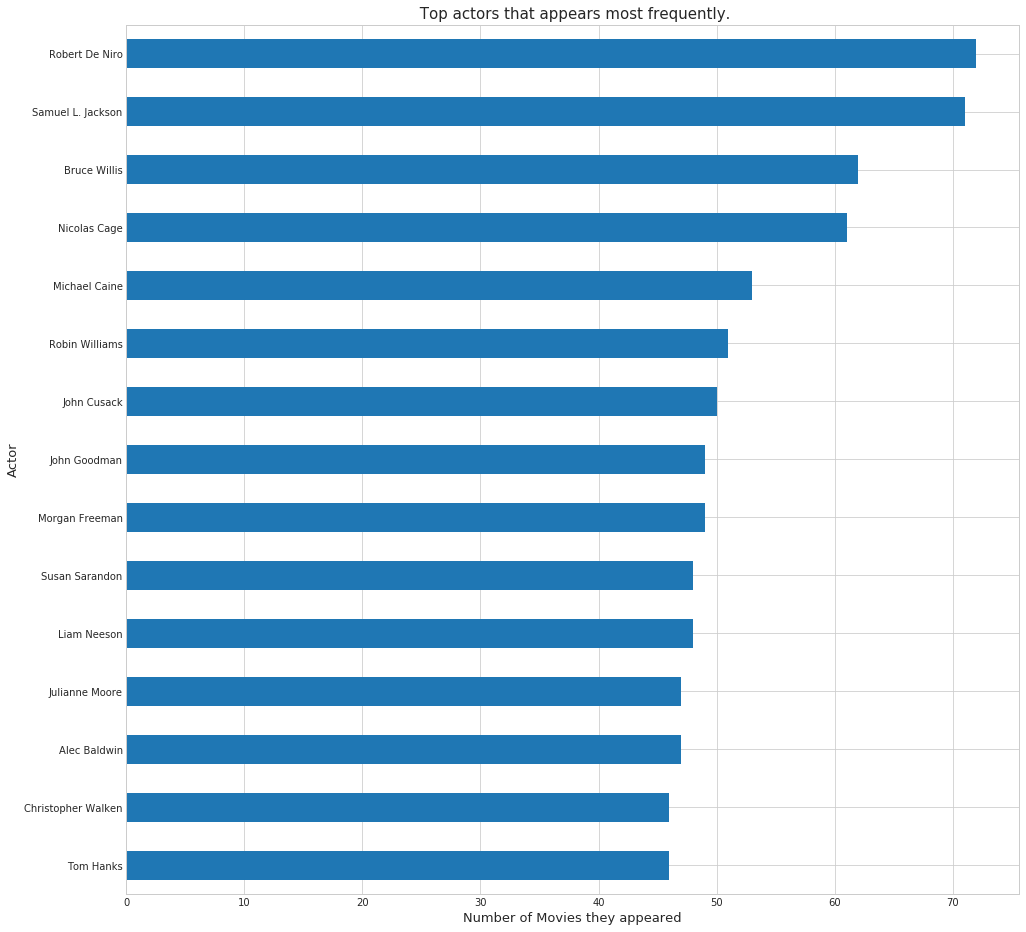

In [71]:
# count hybrid values for column 'cast'
actors_list = separate_hybrid_values('cast').value_counts()

# slice the top 15 directors w.r.t number of movies 
actors_list.iloc[:15].sort_values().plot(kind='barh', figsize=(16,16))

#setup the title and the labels of the plot 
plt.title(" Top actors that appears most frequently.",fontsize=15)
plt.xlabel("Number of Movies they appeared",fontsize= 13)
plt.ylabel("Actor",fontsize= 13)
sns.set_style("whitegrid")

##### Seems like 'Robert De Niro' and 'Samuel L. Jackson' are the top actors who have the most frequent appearances among movies with +70 movies appearances, followed by 'Bruce Will' and 'Nicolas Cage'.


### Q: Do movies' budget affect their ratings? Do people tend to like (give high ratings) to movies that cost producers high budget? 


#### Compare the correlation between movies' budget and average rating
> **A. Compare the correlation between the average movie budget per rating.**

> **B. Compare the correlation between every movie budget vs. its rating.**

#### A. Compare the correlation between the average movie budget per rating.

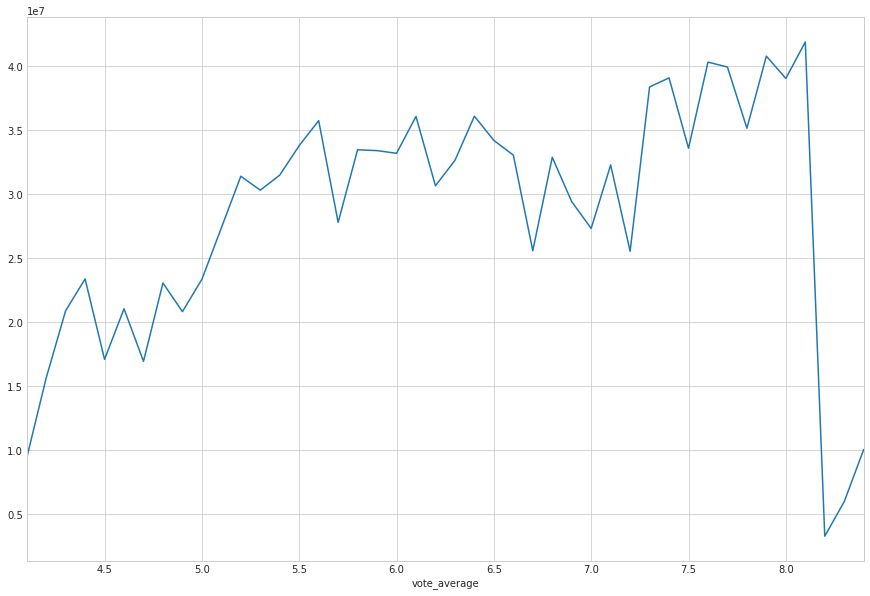

In [72]:
# compare the correlation between movies' budget and average rating
df_votes_budget = df.query('budget > 0 & vote_average > 4')[['budget', 'vote_average']]
df_votes_budget_mean = df_votes_budget.groupby('vote_average').mean()['budget']
# budget_plot = sns.regplot(x=df_votes_budget['vote_average'],y=df_votes_budget['budget'],color='c')

df_votes_budget_mean.plot(kind='line', figsize=(15,10))

##### There is a relative relationship between the average budget invested in a movie and its audience rating. There is a relative possibilty that if the producer invested a high budget in a movie that it would receive a high rating and appeal the audience.

#### **B. Compare the correlation between every movie budget vs. its rating.**

,budget,vote_average
budget,1.000000,0.069443
vote_average,0.069443,1.000000


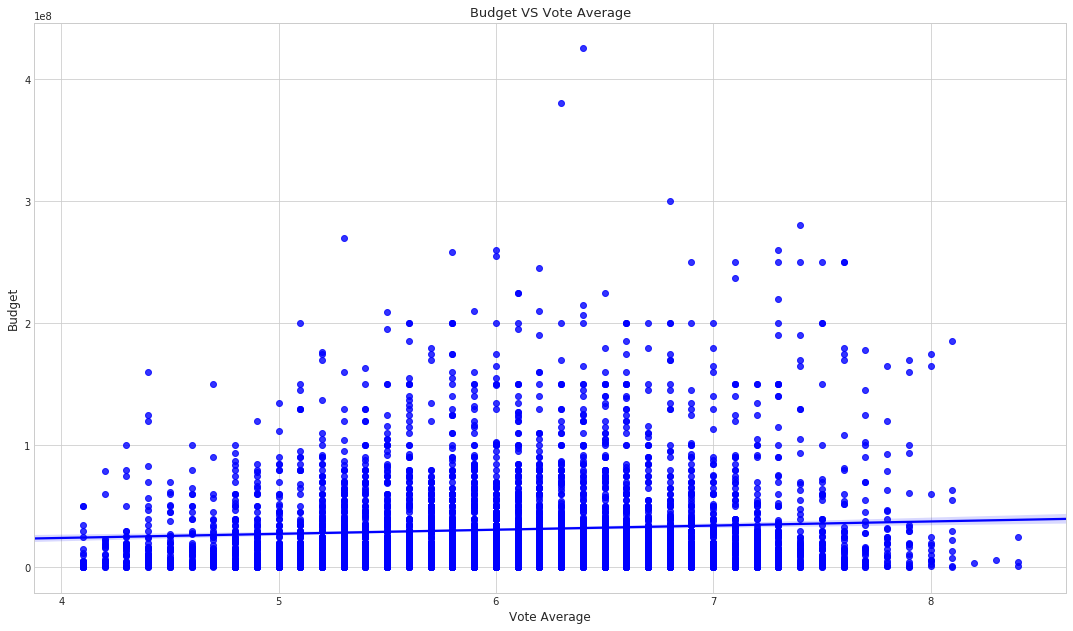

In [73]:
vote_budget_plot = sns.regplot(x=df_votes_budget['vote_average'],y=df_votes_budget['budget'],color='b')

#setup the title and the labels of the scatter plot.
vote_budget_plot.set_title("Budget VS Vote Average",fontsize=13)
vote_budget_plot.set_xlabel("Vote Average",fontsize=12)
vote_budget_plot.set_ylabel("Budget",fontsize=12)

#setup the figure size.
vote_budget_plot.figure.set_size_inches(18.5, 10.5)

# df_votes_budget.plot.scatter(x='vote_average', y='budget', figsize=(15,10))


vote_budget_corr =  df_votes_budget.corr()
vote_budget_corr

##### Here, we could say that there is no actual correlation between the budget invested in a movie and its possibility of audience appealing(rating). So, we could not guarantee to a procuction company that only investing in a movie reflects its audience appealing.

<a id='conclusions'></a>
## Conclusions

> ### Limitation
- The dataset needs several preprocessing steps to be more ready for anaylsis. In many samples, the data is hybrid with multiple values separated by a separator "|" which we could say takes more computational time in cleaning. I think that it is better to clean it more precisley and save the neat version of the dataset.
- The currency is not mentioned in the dataset.
- Votes counts do not appear to be sufficient against average votes. Some movies' rating deceivingly appear to be high, due to very low vote counts. In other words, we could not say that a 8.0 rated movie should be good if only one person rated it as such.



> ### Conclusions drawn
- Popularity vs Revenue:
There is an obvioius positive correlation between popularity and revenue. We could say that high revenue reflects high popularity, and that is true. Revenue streams come from theater tickets, digital copies, etc. Producers would conclude that high revenue streams means good ubiquity for the movie.
**Correlation = 0.63**
- Budget vs Revenue:
There is an obvioius positive correlation between budget invested in a movie and its revenue. There is a good possibility that movies with higher investments result in better revenues.
**Correlation = 0.69**
- Average Budget vs Budget: There is a relative relationship between the average budget invested in a movie and its audience rating. There is a relative possibilty that if the producer invested a high budget in a movie that it would receive a high rating and appeal the audience.
- We could say that there is no actual correlation between the budget invested in a movie and its possibility of audience appealing (rating). So, we could not guarantee to a procuction company that only investing in a movie reflects its audience appealing.
- Seems like 'Robert De Niro' and 'Samuel L. Jackson' are the top actors who have the most frequent appearances among movies with +70 movies appearances, followed by 'Bruce Will' and 'Nicolas Cage'.
- Seems like 'Woody Allen' is the top actor who contributed in maximum number of movies with +40 movies, followed by 'Clint Easwood' and 'Martin Scorsese'




## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0